/ext3/miniconda3/lib/python3.9/site-packages/MDAnalysis/analysis/rdf.py:316: DeprecationWarning: The `bins` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.bins` instead
  warnings.warn(wmsg, DeprecationWarning)
/ext3/miniconda3/lib/python3.9/site-packages/MDAnalysis/analysis/rdf.py:324: DeprecationWarning: The `rdf` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.rdf` instead
  warnings.warn(wmsg, DeprecationWarning)


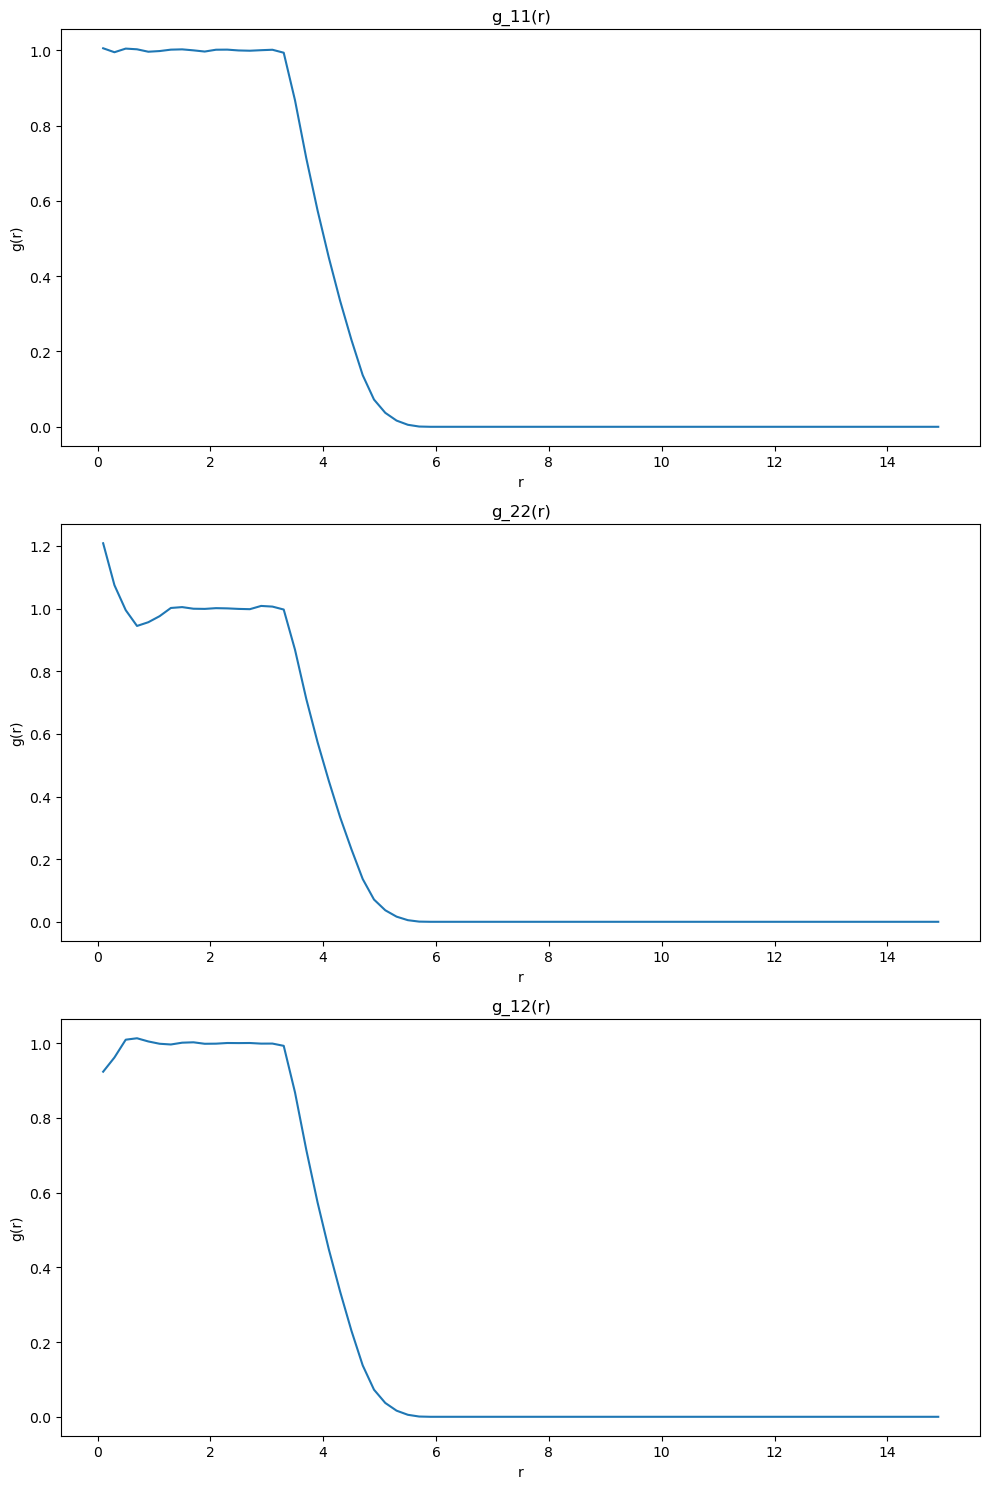

In [2]:
# Import necessary libraries
import MDAnalysis as mda
from MDAnalysis.analysis import rdf, msd
import matplotlib.pyplot as plt
import numpy as np
import glob
import os
import warnings

# Suppress specific warnings
warnings.filterwarnings("ignore", category=UserWarning, message="Guessed all Masses to 1.0")

data_dir = "../Data/prod/"
equil_dir = "../Data/equil/"
trajectory_files = sorted(glob.glob(os.path.join(data_dir, "*.unwrap.dcd")))
temperatures = [1.5, 1.0, 0.9, 0.8, 0.7, 0.65, 0.6, 0.55, 0.5, 0.475]

# Ensure output directory for figures
figures_dir = "../Figures"
os.makedirs(figures_dir, exist_ok=True)

# Load the topology file (assuming it's named similarly to the files in equil)
topology_file = os.path.join(equil_dir, "kalj_T2_n360_v300_10000_1.lammpstrj")

# Part 1: Compute the Radial Distribution Function (RDF)
def compute_rdf():
    fig, ax = plt.subplots(3, 1, figsize=(10, 15))
    pairs = [(1, 1), (2, 2), (1, 2)]
    titles = ['g_11(r)', 'g_22(r)', 'g_12(r)']

    for i, (type1, type2) in enumerate(pairs):
        rdf_analysis = rdf.InterRDF(
            mda.Universe(topology_file, trajectory_files, topology_format="LAMMPSDUMP").select_atoms(f"type {type1}"),
            mda.Universe(topology_file, trajectory_files, topology_format="LAMMPSDUMP").select_atoms(f"type {type2}"),
            nbins=75
        )
        rdf_analysis.run()

        ax[i].plot(rdf_analysis.bins, rdf_analysis.rdf)
        ax[i].set_title(titles[i])
        ax[i].set_xlabel('r')
        ax[i].set_ylabel('g(r)')

    plt.tight_layout()
    plt.savefig(os.path.join(figures_dir, 'rdf_all_temperatures.png'))
    plt.show()

compute_rdf()


Results for T=1.5: {'msds_by_particle': array([[ 0.00000000e+00,  2.91038305e-11,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00, -2.91038305e-11],
       [ 6.65890430e-02,  6.09498177e-02,  6.87342758e-02, ...,
         6.63621726e-02,  7.28265482e-02,  4.54280300e-02],
       [ 9.27819489e-02,  8.67641866e-02,  9.93570827e-02, ...,
         1.04007289e-01,  1.03576391e-01,  6.29802417e-02],
       ...,
       [ 4.98513811e+01,  2.09327098e+01,  2.11508626e+00, ...,
         7.21780150e+00,  6.08073832e+00,  3.54027142e+00],
       [ 4.91646470e+01,  2.05232946e+01,  2.00984882e+00, ...,
         7.49826223e+00,  5.78795746e+00,  3.35600493e+00],
       [ 4.77749151e+01,  2.16222344e+01,  1.94658815e+00, ...,
         7.75587696e+00,  6.00552188e+00,  3.25045319e+00]]), 'timeseries': array([-1.23444958e-11,  6.25670701e-02,  8.57478637e-02,  1.07437837e-01,
        1.29247925e-01,  1.50088054e-01,  1.71130305e-01,  1.91911488e-01,
        2.12677371e-01,  2.32818867e-0

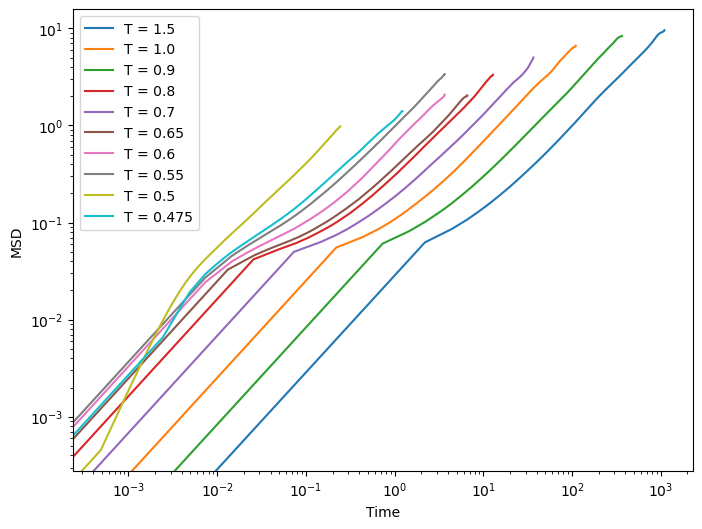

Results for T=1.5: {'msds_by_particle': array([[ 0.00000000e+00,  2.91038305e-11,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00, -2.91038305e-11],
       [ 6.65890430e-02,  6.09498177e-02,  6.87342758e-02, ...,
         6.63621726e-02,  7.28265482e-02,  4.54280300e-02],
       [ 9.27819489e-02,  8.67641866e-02,  9.93570827e-02, ...,
         1.04007289e-01,  1.03576391e-01,  6.29802417e-02],
       ...,
       [ 4.98513811e+01,  2.09327098e+01,  2.11508626e+00, ...,
         7.21780150e+00,  6.08073832e+00,  3.54027142e+00],
       [ 4.91646470e+01,  2.05232946e+01,  2.00984882e+00, ...,
         7.49826223e+00,  5.78795746e+00,  3.35600493e+00],
       [ 4.77749151e+01,  2.16222344e+01,  1.94658815e+00, ...,
         7.75587696e+00,  6.00552188e+00,  3.25045319e+00]]), 'timeseries': array([-1.23444958e-11,  6.25670701e-02,  8.57478637e-02,  1.07437837e-01,
        1.29247925e-01,  1.50088054e-01,  1.71130305e-01,  1.91911488e-01,
        2.12677371e-01,  2.32818867e-0

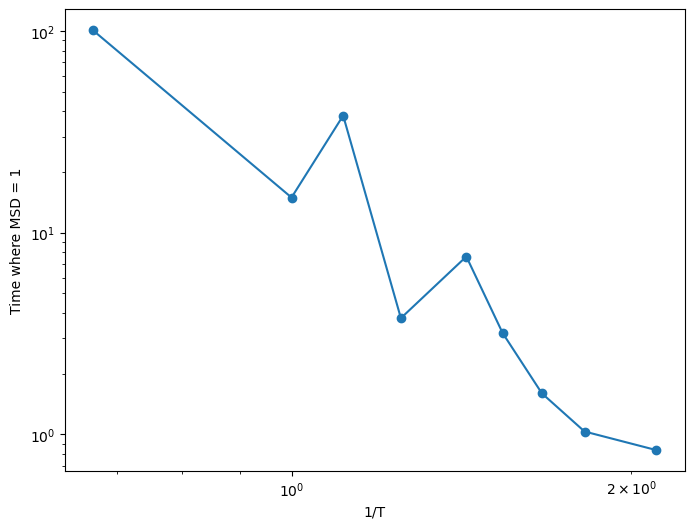

In [3]:
# Part 2: Compute the Mean-Squared Displacement (MSD) for Type 1 Particles
def compute_msd():
    fig, ax = plt.subplots(figsize=(8, 6))

    for temp, traj_file in zip(temperatures, trajectory_files):
        universe = mda.Universe(topology_file, traj_file, topology_format="LAMMPSDUMP")
        msd_analysis = msd.EinsteinMSD(universe, select='type 1', msd_type='xyz', fft=True)
        msd_analysis.run()

        # Debug: Print available results after running MSD analysis
        print(f"Results for T={temp}: {msd_analysis.results}")
        print(f"Keys in results for T={temp}: {list(msd_analysis.results.keys())}")

        # Use 'timeseries' or 'msds_by_particle' if 'msd' is not available
        if 'timeseries' in msd_analysis.results:
            msd_data = msd_analysis.results['timeseries']
        elif 'msds_by_particle' in msd_analysis.results:
            msd_data = msd_analysis.results['msds_by_particle'].mean(axis=0)  # Average over all particles
        else:
            print(f"No valid MSD data for T={temp}")
            continue

        # Plot MSD data
        ax.plot(msd_analysis.times, msd_data, label=f"T = {temp}")

    ax.set_xscale("log")
    ax.set_yscale("log")
    ax.set_xlabel('Time')
    ax.set_ylabel('MSD')
    ax.legend()
    plt.savefig(os.path.join(figures_dir, 'msd_all_temperatures.png'))
    plt.show()

compute_msd()

# Part 3: Find the Time Where MSD ≈ 1 for Each Temperature
def find_msd_time():
    times = []
    inverse_temps = [1/t for t in temperatures]

    for temp, traj_file in zip(temperatures, trajectory_files):
        universe = mda.Universe(topology_file, traj_file, topology_format="LAMMPSDUMP")
        msd_analysis = msd.EinsteinMSD(universe, select='type 1', msd_type='xyz', fft=True)
        msd_analysis.run()

        # Debug: Print available results after running MSD analysis
        print(f"Results for T={temp}: {msd_analysis.results}")
        print(f"Keys in results for T={temp}: {list(msd_analysis.results.keys())}")

        # Use 'timeseries' or 'msds_by_particle' to find MSD ≈ 1
        if 'timeseries' in msd_analysis.results:
            msd_data = msd_analysis.results['timeseries']
        elif 'msds_by_particle' in msd_analysis.results:
            msd_data = msd_analysis.results['msds_by_particle'].mean(axis=0)
        else:
            print(f"No valid MSD data for T={temp}")
            continue  # Skip this temperature if no valid data
        
        time_data = msd_analysis.times
        # Find the time closest to MSD = 1
        if np.any(msd_data >= 1):
            time_msd1 = time_data[np.searchsorted(msd_data, 1)]
            times.append(time_msd1)
        else:
            print(f"MSD never reaches 1 for T={temp}")
            times.append(np.nan)  # Record NaN if MSD < 1 throughout

    # Remove NaN values from times and inverse_temps for plotting
    times = np.array(times)
    inverse_temps = np.array(inverse_temps)
    valid_indices = ~np.isnan(times)
    times = times[valid_indices]
    inverse_temps = inverse_temps[valid_indices]

    # Plot MSD=1 time vs 1/T
    plt.figure(figsize=(8, 6))
    plt.loglog(inverse_temps, times, marker='o')
    plt.xlabel('1/T')
    plt.ylabel('Time where MSD = 1')
    plt.savefig(os.path.join(figures_dir, 'msd_vs_invT.png'))
    plt.show()

find_msd_time()


